# Data Exploration

In [1]:
import numpy as np
import scipy.ndimage as ndi
import imageio as imio
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Load Data

In [2]:
RAW_IMAGES_PATH = '../../data/raw_data/plasmodium/'

In [3]:
train_images_paths = os.listdir(RAW_IMAGES_PATH)

In [4]:
train_images_paths

['20190320_102832.jpg',
 '20190320_101456.jpg',
 '20190410_103614.jpg',
 '20190411_120941.jpg',
 '20190405_120006(0).jpg',
 '20190411_123507.jpg',
 '20190405_115240(0).jpg',
 '20190320_130051.jpg',
 '20190411_121057.jpg',
 '20190401_121400.jpg',
 '20190410_103159.jpg',
 '20190320_114419.jpg',
 '20190401_153828.jpg',
 '20190320_105737.jpg',
 '20190320_102333.jpg',
 '20190320_125748.jpg',
 '20190411_132218(0).jpg',
 '20190410_103611.jpg',
 '20190411_132007.jpg',
 '20190411_123827.jpg',
 '20190320_114414.jpg',
 '20190411_120500.jpg',
 '20190319_153131.jpg',
 '20190411_123830.jpg',
 '20190319_152040.jpg',
 '20190411_124334.jpg',
 '20190320_102830.jpg',
 '20190320_101802.jpg',
 '20190320_105740.jpg',
 '20190405_115218.jpg',
 '20190405_115243.jpg',
 '20190405_143736.jpg',
 '20190410_101725.jpg',
 '20190405_115637.jpg',
 '20190410_103607.jpg',
 '20190411_125624.jpg',
 '20190411_120942.jpg',
 '20190411_152340.jpg',
 '20190410_102743.jpg',
 '20190319_152047.jpg',
 '20190320_114413.jpg',
 '20190

In [5]:
train_images = []
train_images_gray_scale = []
train_images_shape = []

for i in train_images_paths:
    new_image = imio.imread(RAW_IMAGES_PATH+i)
    train_images.append(new_image)
    train_images_gray_scale.append(new_image[:,:,0])
    train_images_shape.append(new_image.shape)
    

In [6]:
train_images_shape =  np.array(train_images_shape)

### Number of images in data set

In [7]:
len(train_images)

225

### Remove duplicated images

In [8]:
## TO DO:

### RENAME IMAGE FILES

In [9]:
## TO DO: We need to rename the image files, maybe some hash name?

#### Test random image

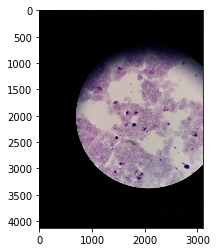

In [10]:
plt.imshow(train_images[5])

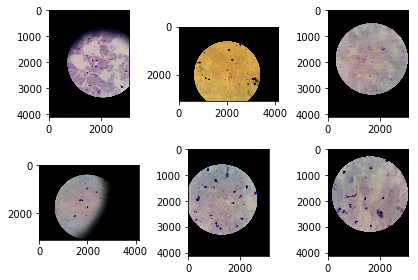

In [11]:
fig, axes = plt.subplots(2,3)
axes[0,0].imshow(train_images[5])
axes[1,0].imshow(train_images[2])

axes[0,1].imshow(train_images[10])
axes[1,1].imshow(train_images[4])

axes[0,2].imshow(train_images[15])
axes[1,2].imshow(train_images[6])


#fig = plt.gcf()
#for ax in fig.axes:
#    ax.axis('off')
plt.tight_layout()
plt.show()

## Images Shape

##### Get percentile, distribution of the height,weigth and area of images

In [12]:
train_images[5].shape

(4128, 3096, 3)

### Heights

In [13]:
heights = train_images_shape[:,0]

In [14]:
print('MEAN     : ' , np.mean(heights))
print('MAX VALUE: ' , np.amax(heights))
print('MIN VALUE: ' , np.amin(heights))
print('PCTL 25% : ' , np.percentile(heights, 25))
print('PCTL 50% : ' , np.percentile(heights, 50))
print('PCTL 75% : ' , np.percentile(heights, 75))

MEAN     :  3733.5466666666666
MAX VALUE:  4128
MIN VALUE:  3096
PCTL 25% :  3096.0
PCTL 50% :  4128.0
PCTL 75% :  4128.0


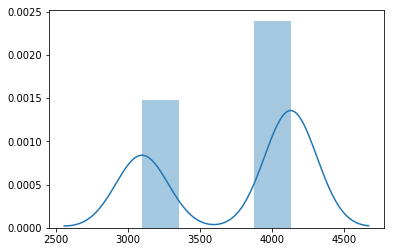

In [15]:
sns.distplot(heights)

### Widths

In [16]:
widths = train_images_shape[:,1]

In [17]:
print('MEAN     : ' , np.mean(widths))
print('MAX VALUE: ' , np.amax(widths))
print('MIN VALUE: ' , np.amin(widths))
print('PCTL 25% : ' , np.percentile(widths, 25))
print('PCTL 50% : ' , np.percentile(widths, 50))
print('PCTL 75% : ' , np.percentile(widths, 75))

MEAN     :  3490.4533333333334
MAX VALUE:  4128
MIN VALUE:  3096
PCTL 25% :  3096.0
PCTL 50% :  3096.0
PCTL 75% :  4128.0


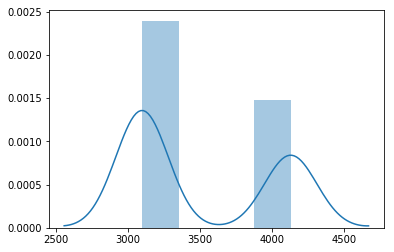

In [18]:
sns.distplot(widths)

## Find Average Black areas 

Data type: uint8
Min. value: 0
Max value: 221


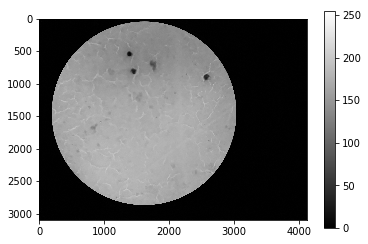

In [19]:
im = train_images_gray_scale[7]

print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())


plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

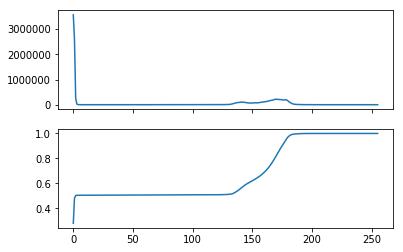

In [20]:
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')

In [21]:
mask_blood = np.where(im < 50 , 1, 0)
labels, nlabels = ndi.label(mask_blood)
nlabels

23

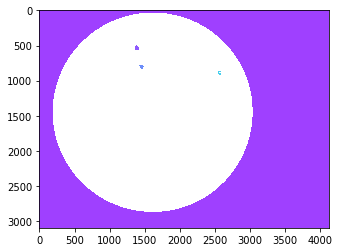

In [22]:
## BLACK AREA ###
overlay = np.where(labels>0, labels, np.nan)
plt.imshow(overlay, cmap='rainbow',alpha=0.75)


### Remove black area

In [29]:
### TEST SIMPLE MASK OF BLOOD AREA###
mask_blood = np.where( (im > 120) & (im <200) , 1, 0)
labels, nlabels = ndi.label(mask_blood)
nlabels

43

1
(slice(38, 2867, None), slice(196, 3041, None))


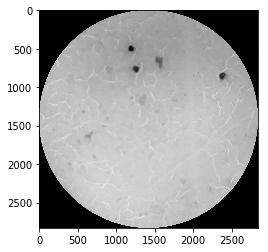

In [31]:
bboxes = ndi.find_objects(mask_blood)
print(len(bboxes))
print(bboxes[0])
plt.imshow(im[bboxes[0]],  cmap='gray')

## Store data as numpy arrays

Save a binary file with the array represantation of images for the pre-procesing part

In [33]:
## TO DO: Save the images files with numpy

## Next Steps:
### Pre-Procesing
 * Define an unique size for images
     * Try to remove the black areas 
 * Center images
 
    